In [3]:
# 1. sys.pathにsrcディレクトリを追加 (インポートパスを指定)
import sys
sys.path.append('../..') 

# 2. src/metrics.pyから関数をインポート
# Pythonのモジュールとして認識される
from src.metrics import evaluate_model

In [4]:
from sklearn.datasets import load_iris 
 
iris = load_iris()
X= iris.data
y= iris.target

import pandas as pd 

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["species"] = iris.target

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

steps = [
    ('scaler',StandardScaler()),
    (('logreg'),LogisticRegression(random_state=42))
]

pipeline = Pipeline(steps)

pipeline.fit(X_train,y_train)



,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [5]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

steps_rf = [
    ("scaler",StandardScaler()),
    ("rf",RandomForestClassifier(random_state=42))
]

pipeline_rf = Pipeline(steps_rf)

In [6]:
param_grid ={
    "rf__n_estimators":[50,100,200],
    "rf__max_depth":[3,5,10,None],
    "rf__criterion":["gini","emtropy"]
    }

In [7]:
grid_search = GridSearchCV(
    estimator=pipeline_rf,
    param_grid= param_grid,
    scoring="accuracy",
    cv = 5,
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\unine\.conda\envs\chem-ml\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\unine\.conda\envs\chem-ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\unine\.conda\envs\chem-ml\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\unine\.conda\envs\chem-ml\Lib\site-packages\sklearn\pipeline.py", line 

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'rf__criterion': ['gini', 'emtropy'], 'rf__max_depth': [3, 5, ...], 'rf__n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [8]:
print("最適なハイパーパラメーター", grid_search.best_params_)
print(f"ベストスコア(CV):{grid_search.best_score_:.4f}")

best_pipeline_rf = grid_search.best_estimator_

最適なハイパーパラメーター {'rf__criterion': 'gini', 'rf__max_depth': 3, 'rf__n_estimators': 50}
ベストスコア(CV):0.9583


---Iris RandomForest Best評価結果---
精度(Accuracy):0.9667

混同行列:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


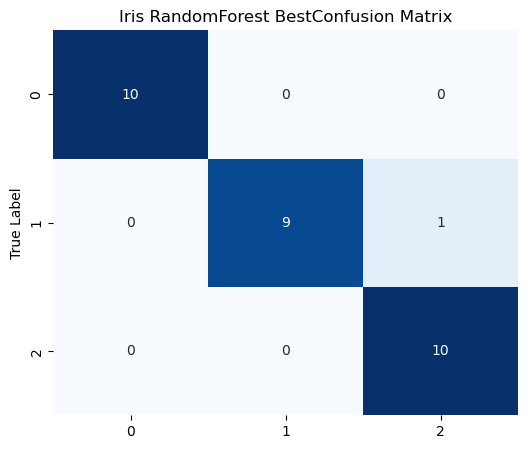

In [9]:
y_pred_rf = best_pipeline_rf.predict(X_test)
evaluate_model(y_test,y_pred_rf,model_name="Iris RandomForest Best")

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

best_rf_model = best_pipeline_rf['rf']

importances = best_rf_model.feature_importances_
feature_names = df.drop("species", axis=1).columns


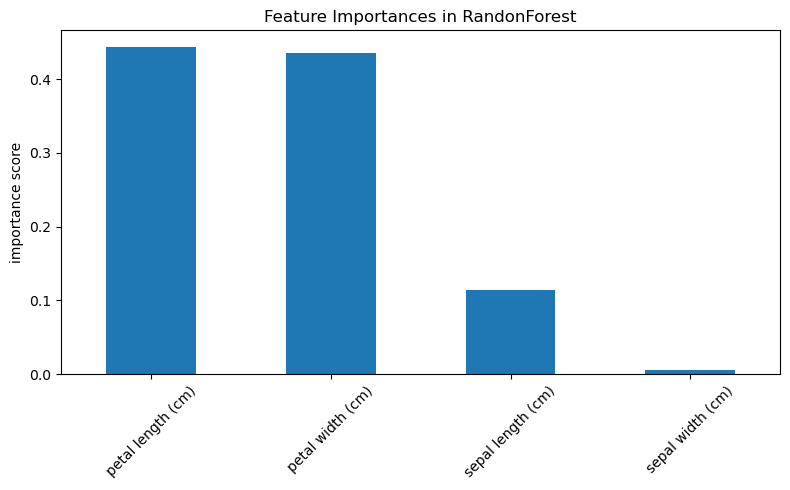

In [15]:
plt.figure(figsize=(8,5))
pd.Series(importances,index=feature_names).sort_values(ascending=False,).plot(kind="bar")
plt.title("Feature Importances in RandonForest")
plt.ylabel("importance score")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()